In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split 

from sklearn.model_selection import GridSearchCV, cross_validate

In [3]:
train = pd.read_csv('training_set_data.csv')
pd.set_option('display.max_columns', 500)
train.head(3)

,person_id,age,citizen_status,nativity_status,weekly_hours_worked,total_income,self_employed_income,wage_income,interest_income,other_income,marital_status,school_status,sex,when_last_worked,worked_last_week,language,race_native_american,race_asian,race_black,race_native_hawaiian,race_pacific_islander,race_white,race_other,uninsured,household_id
0,1,45,citizen_birth,native_born,15,908.0,62.0,800.0,11.0,35.0,married,not_student,FEMALE,in_last_year,worked,English,0,0,0,0,0,1,0,0,1
1,2,47,citizen_birth,native_born,50,180499.0,49.0,160007.0,20424.0,19.0,married,not_student,MALE,in_last_year,worked,English,0,0,0,0,0,1,0,0,1
2,4,26,citizen_birth,native_born,0,7367.0,93.0,4.0,20.0,7250.0,never_married,not_student,male,over_five_years_ago,not_reported,English,0,0,1,0,0,0,0,0,2


In [4]:
train.sex = train.sex.replace({'FEMALE': 'F'})
train.sex = train.sex.replace({'female': 'F'})

train.sex = train.sex.replace({'MALE': 'M'})
train.sex = train.sex.replace({'male': 'M'})

train.sex.value_counts()

F    30834
M    28763
Name: sex, dtype: int64

In [5]:
for val in train.language.values:
    if val != 'English':
        train.language = train.language.replace({val:'not_english'})

In [6]:
train.language.value_counts()

English        49326
not_english    10271
Name: language, dtype: int64

In [7]:
train.uninsured.value_counts()

0    54977
1     4620
Name: uninsured, dtype: int64

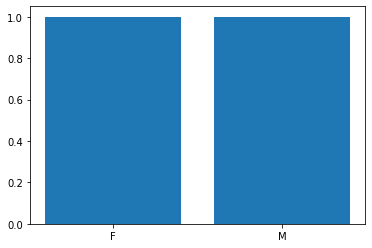

In [8]:
plt.bar(train.sex, train.uninsured)
plt.show()

In [ ]:
plt.bar(train.sex, train.total_income, color='r')

<BarContainer object of 59597 artists>

In [ ]:
plt.bar(train.nativity_status, train.total_income)

## Target variable

In [24]:
X = train.drop(['person_id', 'uninsured', 'household_id'], axis=1)
y= train['uninsured']

## One hot encoder

In [19]:
cont = X.select_dtypes(exclude='object')

cat = X.select_dtypes(include='object')

## scaling

In [333]:
for col in cont.columns:
    cont[col]= (cont[col]-min(cont[col]))/(max(cont[col]-min(cont[col])))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [334]:
ehe = OneHotEncoder(drop='first')


In [335]:
tran = ehe.fit_transform(cat).toarray()

In [337]:
tran_df= pd.DataFrame(tran, columns=ehe.get_feature_names(cat.columns))

In [338]:
tran_df.head(2)

,citizen_status_citizen_naturalized,citizen_status_noncitizen,nativity_status_native_born,marital_status_married,marital_status_never_married,marital_status_separated,marital_status_widowed,school_status_private_school,school_status_public_school,sex_M,when_last_worked_in_last_year,when_last_worked_over_five_years_ago,worked_last_week_not_reported,worked_last_week_worked,language_not_english
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [343]:
tran_df.reset_index(inplace=True, drop=True)


In [344]:
cont.reset_index(inplace=True, drop=True)

In [347]:
X = tran_df.join(cont)



## Training and Testing sets

In [348]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [349]:
from sklearn.ensemble import RandomForestClassifier

R_forest = RandomForestClassifier(n_estimators=10)

R_forest = RandomForestClassifier()
R_model = R_forest.fit(X_train, y_train)

In [350]:
R_model.score(X_test, y_test)

0.9240492170022372

In [351]:
y_pred = R_model.predict(X_test)

In [352]:
from sklearn import metrics

metrics.f1_score(y_test, y_pred)

0.16069221260815822

In [353]:
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.5098039215686274


In [354]:
metrics.f1_score(y_test, y_pred)

0.16069221260815822

In [355]:
metrics.recall_score(y_test, y_pred)

0.09537784299339692

In [365]:
a = pd.DataFrame(R_model.feature_importances_)

a['features'] = X_train.columns

a.columns = ['importance', 'features']
a = a.sort_values(by='importance', ascending=False)

a.head()

,importance,features
17,0.141849,total_income
19,0.136155,wage_income
21,0.127599,other_income
20,0.122594,interest_income
18,0.121606,self_employed_income


In [362]:
# from sklearn.preprocessing import binarize
# # it will return 1 for all values above 0.3 and 0 otherwise
# # results are 2D so we slice out the first column
# y_pred_class = binarize(y_pred, 0.3)

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 ... 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

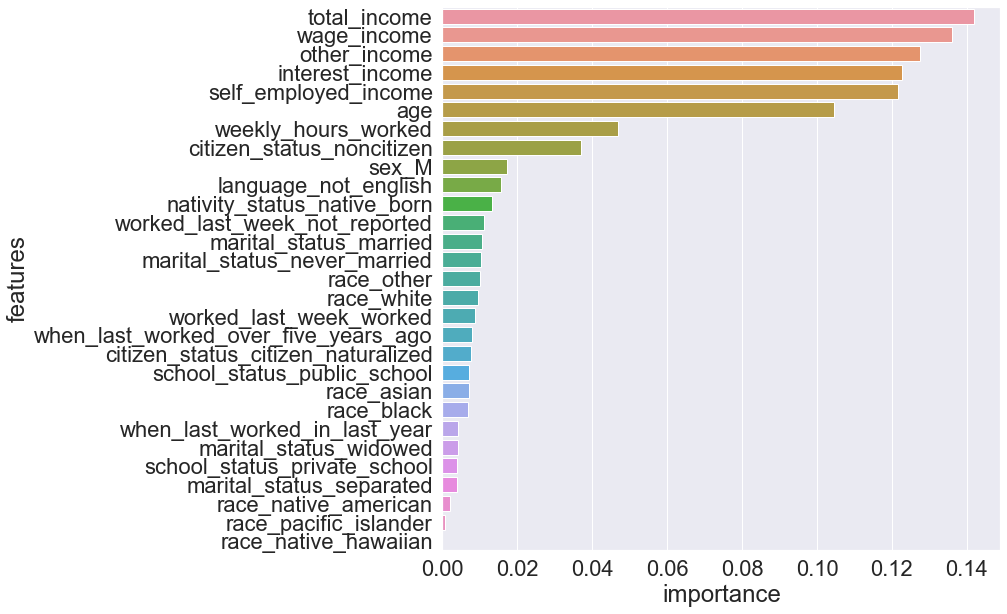

In [357]:
plt.figure(figsize=(10, 10))
sns.barplot(a.importance, a.features)

In [360]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import cross_val_score

print(cross_val_score(R_model, X_train, y_train, scoring='accuracy', cv = 6))


[0.9211851  0.92089745 0.92420538 0.92334244 0.92291097 0.91973533]


In [361]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
pred = R_model.predict(X_test)

#Confusion matrix and classification report
forest_confusion = confusion_matrix(y_test, pred, normalize='true')
forest_report = classification_report(y_test, pred)

print(forest_confusion)
print(forest_report)

[[0.99243204 0.00756796]
 [0.90462216 0.09537784]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     16517
           1       0.51      0.10      0.16      1363

    accuracy                           0.92     17880
   macro avg       0.72      0.54      0.56     17880
weighted avg       0.90      0.92      0.90     17880



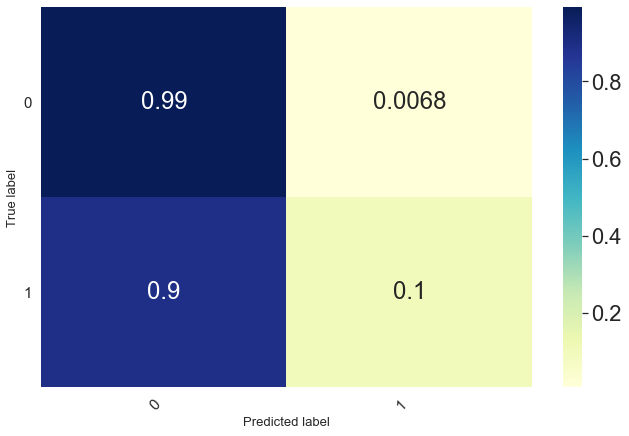

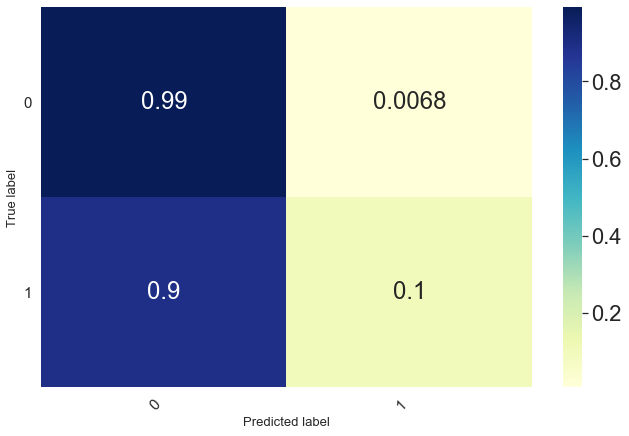

In [323]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (11,7), fontsize=19):
    
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize )
    try:
        heatmap = sns.heatmap(df_cm, annot=True, cmap='YlGnBu')
        sns.set(font_scale=2)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    
    plt.ylabel('True label', fontsize=13)
    plt.xlabel('Predicted label', fontsize=13)
    
    return fig


forest_classes = R_model.classes_

print_confusion_matrix(forest_confusion, forest_classes, figsize =(11,7), fontsize=15, )

In [324]:
%store -r new

In [325]:
unlabeled = pd.read_csv('unlabeled_data.csv')
pd.set_option('display.max_columns', 500)
unlabeled.head()

,person_id,age,citizen_status,nativity_status,weekly_hours_worked,total_income,self_employed_income,wage_income,interest_income,other_income,marital_status,school_status,sex,when_last_worked,worked_last_week,language,race_native_american,race_asian,race_black,race_native_hawaiian,race_pacific_islander,race_white,race_other,household_id
0,12,28,citizen_birth,native_born,45,15254.0,15081.0,82.0,16.0,75.0,never_married,not_student,MALE,in_last_year,worked,English,0,0,0,0,0,1,0,6
1,13,40,citizen_birth,native_born,32,10291.0,45.0,9068.0,57.0,1121.0,divorced,not_student,MALE,in_last_year,worked,English,0,0,0,0,0,1,0,7
2,22,68,citizen_birth,native_born,0,13194.0,80.0,34.0,69.0,13011.0,married,not_student,MALE,over_five_years_ago,did_not_work,English,0,0,0,0,0,1,0,13
3,23,64,citizen_birth,native_born,40,30194.0,33.0,30094.0,37.0,30.0,married,not_student,F,in_last_year,worked,English,0,0,0,0,0,1,0,13
4,25,29,citizen_birth,native_born,40,52174.0,12.0,52101.0,52.0,9.0,never_married,not_student,MALE,in_last_year,worked,English,0,0,0,0,0,1,0,15


In [326]:
new.head()

,citizen_status_citizen_naturalized,citizen_status_noncitizen,nativity_status_native_born,marital_status_married,marital_status_never_married,marital_status_separated,marital_status_widowed,school_status_private_school,school_status_public_school,sex_M,when_last_worked_in_last_year,when_last_worked_over_five_years_ago,worked_last_week_not_reported,worked_last_week_worked,language_not_english,age,weekly_hours_worked,total_income,self_employed_income,wage_income,interest_income,other_income,race_native_american,race_asian,race_black,race_native_hawaiian,race_pacific_islander,race_white,race_other
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.131579,0.454545,0.014366,0.048633,0.000162,0.000065,0.000353,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.289474,0.323232,0.009685,0.000145,0.017953,0.000233,0.005276,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.657895,0.000000,0.012423,0.000258,0.000067,0.000282,0.061239,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.605263,0.404040,0.028458,0.000106,0.059580,0.000151,0.000141,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.144737,0.404040,0.049191,0.000039,0.103150,0.000212,0.000042,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [327]:
predictions = R_model.predict_proba(new)

df = pd.DataFrame(predictions)

df['person_id'] = unlabeled.person_id


df.head()

,0,1,person_id
0,0.82,0.18,12
1,0.94,0.06,13
2,0.94,0.06,22
3,0.92,0.08,23
4,0.99,0.01,25
